# Pymaceuticals Inc.
---

### Analysis
 

In [20]:
#PART 1: PREPARE THE DATA
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

# Code to make computer pull the "study data" files
mouse_metadata_path = '/Users/mauriciogil/Desktop/Module5/Starter_Code 5/Pymaceuticals/Mouse_metadata.csv'
study_results_path = '/Users/mauriciogil/Desktop/Module5/Starter_Code 5/Pymaceuticals/Study_results.csv'

# Code to check if the paths are correct and files exist
print("Mouse Metadata Path Exists:", os.path.exists(mouse_metadata_path))
print("Study Results Path Exists:", os.path.exists(study_results_path))

# Code to read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Code to combine the data into a single DataFrame
data_combined = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Code to display the data table for preview
print(data_combined.head())



Mouse Metadata Path Exists: True
Study Results Path Exists: True
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [17]:
# Code to Checking the number of mice.
unique_mice = data_combined['Mouse ID'].nunique()

# Code to display the number of unique mice
print(f'The number of unique mice in the dataset is: {unique_mice}')

The number of unique mice in the dataset is: 249


In [18]:
# Code to get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = data_combined[data_combined.duplicated(['Mouse ID', 'Timepoint'])]

# Code to display the duplicate mice data
print("Duplicate mice entries based on Mouse ID and Timepoint:")
print(duplicate_mice)


Duplicate mice entries based on Mouse ID and Timepoint:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
# Code to get the list of duplicate mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Code to get all the data for the duplicate mouse IDs
duplicate_mouse_data = data_combined[data_combined['Mouse ID'].isin(duplicate_mouse_ids)]

# Code to display the data for the duplicate mouse IDs
print("All data for the duplicate mouse IDs:")
print(duplicate_mouse_data)


All data for the duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva 

In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Code to identify the duplicate mouse by its ID
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()[0]  # Assuming there's only one duplicate ID

# Code to create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = data_combined[data_combined['Mouse ID'] != duplicate_mouse_id]

# Code to display the cleaned DataFrame
print("Cleaned data (duplicate mouse ID removed):")
print(cleaned_data)


Cleaned data (duplicate mouse ID removed):
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1             

In [22]:
# Ccode for checking the number of mice in the clean DataFrame.
number_of_mice = cleaned_data['Mouse ID'].nunique()

# Code to display the number of mice
print(f"The number of unique mice in the clean DataFrame is: {number_of_mice}")


The number of unique mice in the clean DataFrame is: 248


## Summary Statistics

In [24]:
# PART 2: Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group by drug regimen and calculate the mean, median, variance, standard deviation, and SEM of the tumor volume
grouped_data = cleaned_data.groupby('Drug Regimen')

# Code to calculate mean
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()

# Code to calculate median
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()

# Code to calculate variance
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()

# Code to calculate standard deviation
std_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()

# Code to calculate SEM
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Code to assemble the resulting series into a single summary DataFrame
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})

# Finally this code will display the summary DataFrame
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Code to generate summary statistics using the aggregation method in a single line
summary_agg = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Code to rename the columns for clarity
summary_agg.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']

# Code to display the summary statistics table
summary_agg


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

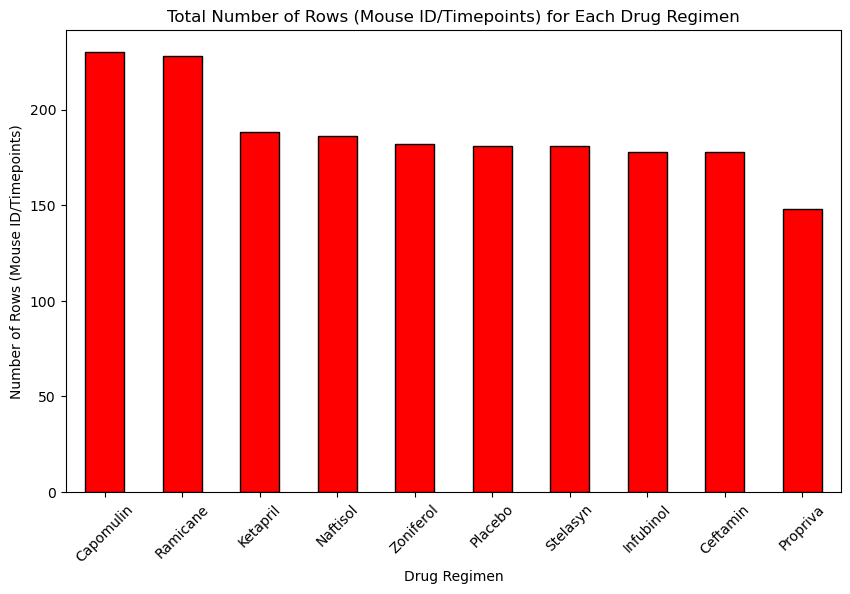

In [34]:
# PART 3: Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# I chose red and black for the bar graph colors. Red for bars and black for outline

# Count the number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Code to generate a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='red', edgecolor='black')

# Code to set the title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability. Stack overflow helped with this.

# Code to display the plot
plt.show()


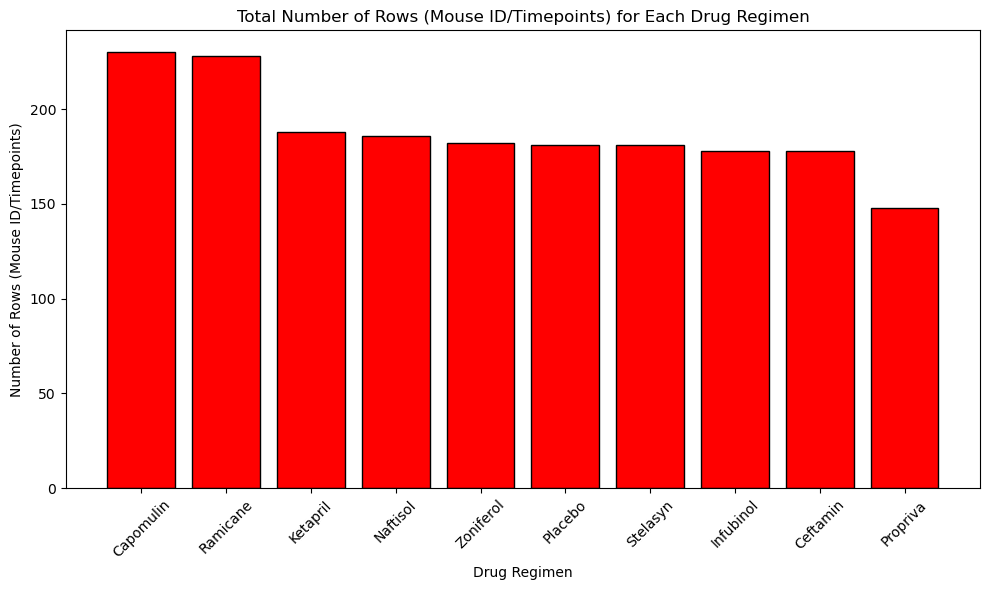

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# The following code is after you have a cleaned dataframe
# I chose red and black for the bar graph colors. Red for bars and black for outline

# Code to count the number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Code to extract the regimen names and corresponding counts
regimen_names = drug_regimen_counts.index
counts = drug_regimen_counts.values

# Code to generate a bar plot using the Matplotlib pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, counts, color='red', edgecolor='black')

# Code to set the title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability. Stack overflow helped with this tip.

# Code to display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


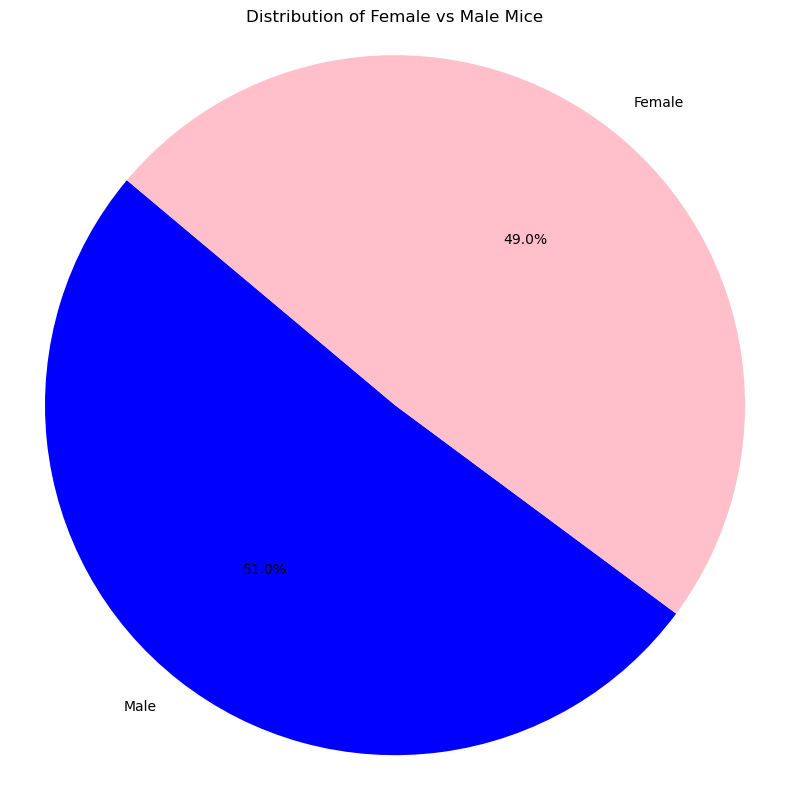

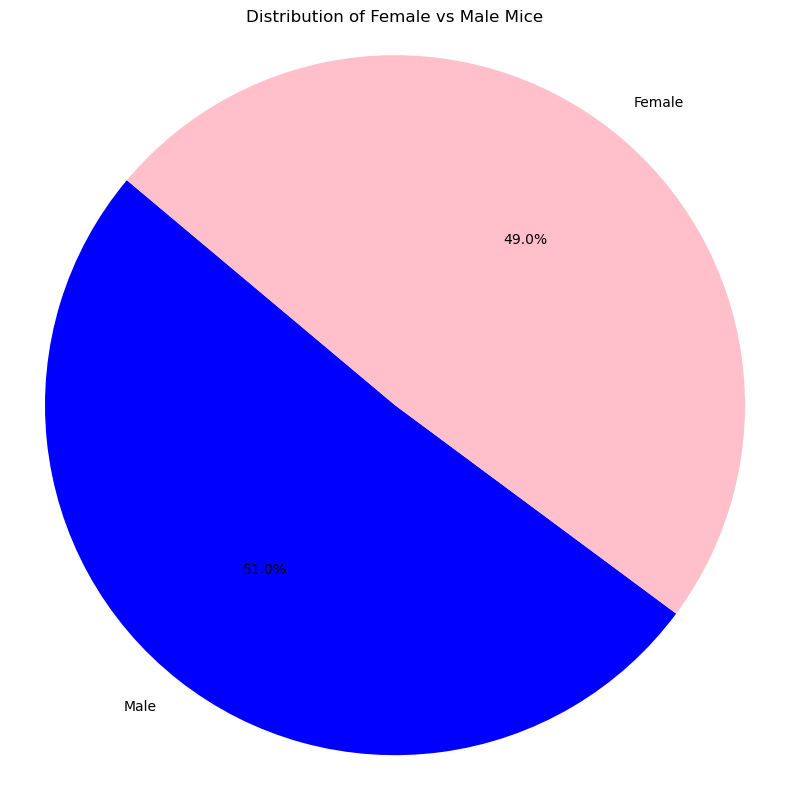

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import matplotlib.pyplot as plt
import pandas as pd

# This step requires cleaning the dataframe and creating a column that stores the sex of the mice
# I used blue to depict male and pink color to depict female.

# Code to count the number of male and female mice
sex_counts = cleaned_data['Sex'].value_counts()

# Code to generate a pie plot using Pandas. Stack overflow helped with getting the variables correct on this.
plt.figure(figsize=(8, 8))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'], startangle=140)

# Code to set the title and labels
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')  # Remove y-label which is 'Sex'
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the plot
plt.tight_layout()
plt.show()


# Code to count the number of male and female mice
sex_counts = cleaned_data['Sex'].value_counts()

# Code to generate a pie plot using Pandas
plt.figure(figsize=(8, 8))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'], startangle=140)

# Code to set the title and labels
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')  # Remove y-label which is 'Sex'
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the plot
plt.tight_layout()
plt.show()



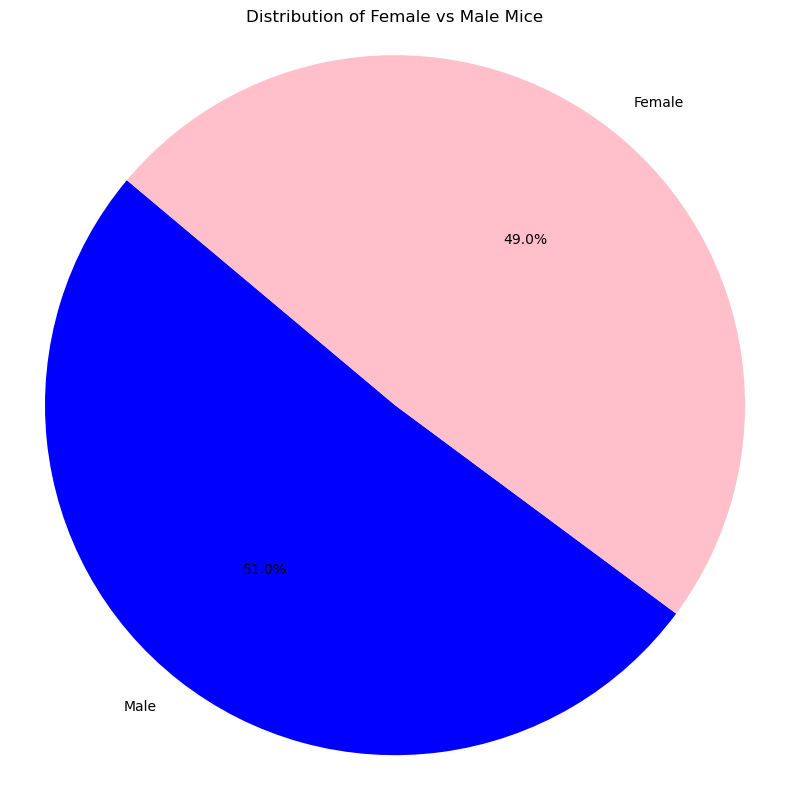

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Code to count the number of male and female mice
sex_counts = cleaned_data['Sex'].value_counts()

# Code to specify labels and sizes for the pie chart
labels = sex_counts.index.tolist()
sizes = sex_counts.tolist()
colors = ['blue', 'pink']

# Code to create the pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Code to set the title and adjust the aspect ratio to be a circle
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the plot
plt.tight_layout()
plt.show()



## Quartiles, Outliers and Boxplots

In [47]:
# PART 4: Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# First, get the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Second, convert to DataFrame to preserve the 'Mouse ID' as a column
last_timepoints_df = pd.DataFrame(last_timepoints)

# Next,merge with original DataFrame to get tumor volume at the last timepoint
data_combined = pd.merge(last_timepoints_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Then, filter for specific treatment regimens
filtered_data = merged_data[merged_data['Drug Regimen'].isin(four_treatment_regimens)]

# Finally, display the filtered DataFrame (optional)
print(filtered_data.head())




  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
3     a275         45     Ceftamin  Female          20          28   
6     a411         45     Ramicane    Male           3          22   
7     a444         45     Ramicane  Female          10          25   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
3           62.999356                 3  
6           38.407618                 1  
7           43.047543                 0  


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# This code fixes a Name error where the merged dataset is not defned
merged_data_last_timepoint = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')
merged_data_last_timepoint = merged_data_last_timepoint.groupby('Mouse ID').last()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

for treatment in treatments:
    # Code to filter the DataFrame for rows containing data for the current treatment
    treatment_data = merged_data_last_timepoint.loc[merged_data_last_timepoint['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Code to append tumor volume data to the list for plotting
    tumor_vol_data.append(treatment_data)
    
    # Code to calculate quartiles, IQR, and bounds
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Code to determine upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Code to determine outliers
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f"-----------------------------")
    print(f"{treatment} Treatment:")
    print(f"-----------------------------")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    if outliers.empty:
        print(f"No potential outliers.")
    else:
        print(f"Potential outliers:")
        print(outliers)
    print(f"-----------------------------")



-----------------------------
Capomulin Treatment:
-----------------------------
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Interquartile Range (IQR): 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
No potential outliers.
-----------------------------
-----------------------------
Ramicane Treatment:
-----------------------------
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Interquartile Range (IQR): 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
No potential outliers.
-----------------------------
-----------------------------
Infubinol Treatment:
-----------------------------
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Interquartile Range (IQR): 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers:
Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----------------------------
-----------------------------
Ceftamin Treatment:
------

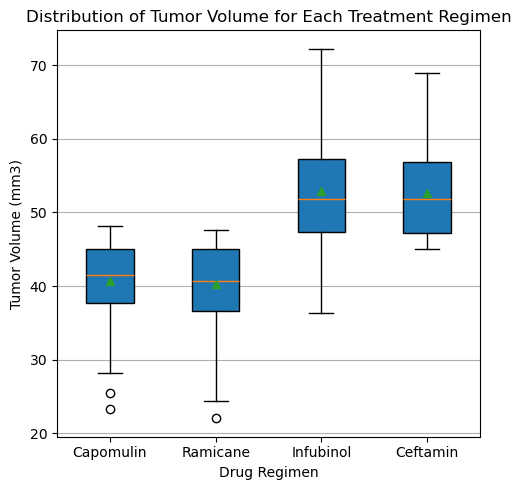

In [53]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt
import pandas as pd

# Code to filter data for the specific treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_regimens)]

# Code to group by 'Drug Regimen' and collect 'Tumor Volume (mm3)' into a dictionary of lists
tumor_volume_data = {regimen: filtered_data.loc[filtered_data['Drug Regimen'] == regimen, 'Tumor Volume (mm3)'].tolist() for regimen in treatment_regimens}

# Code to create a list of tumor volume data for each regimen
data_to_plot = [tumor_volume_data[regimen] for regimen in treatment_regimens]

# Code to create a box plot. Stack overflow helps with this.
plt.figure(figsize=(5, 5))
plt.boxplot(data_to_plot, labels=treatment_regimens, patch_artist=True, showmeans=True)
plt.title('Distribution of Tumor Volume for Each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Line and Scatter Plots

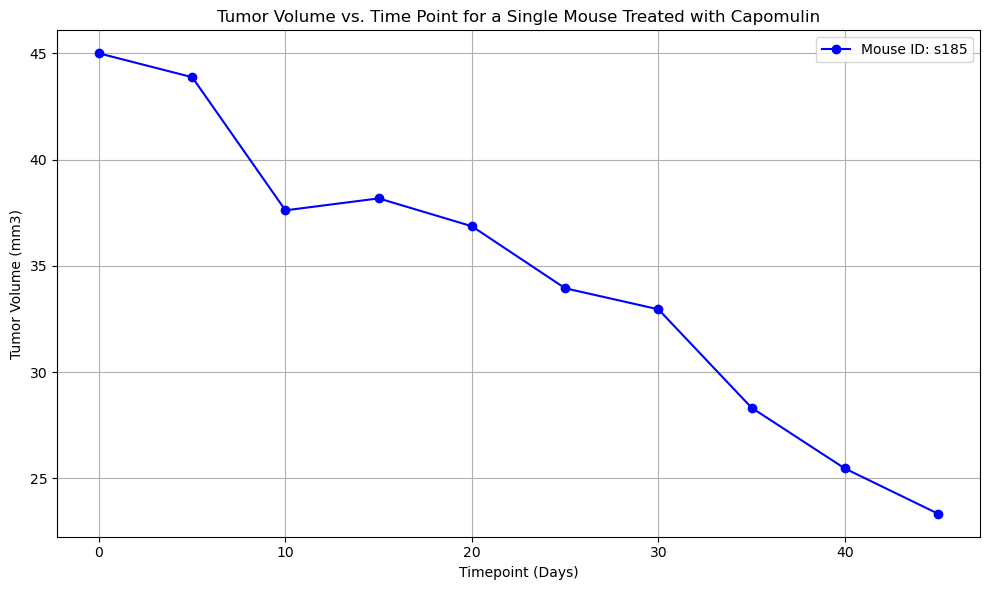

In [66]:
# PART 5: Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt
import pandas as pd

# Prompt requests a time point for a single mouse. So this code chooses a single mouse treated with Capomulin. 
# "s185" is the first mouse in the dataset treated with Capomulin.

mouse_id = 's185'
capomulin_data = cleaned_data[(cleaned_data['Drug Regimen'] == 'Capomulin') & (cleaned_data['Mouse ID'] == mouse_id)]

# Code to extract 'Timepoint' and 'Tumor Volume (mm3)' for the selected mouse
timepoints = capomulin_data['Timepoint']
tumor_volumes = capomulin_data['Tumor Volume (mm3)']

# Finally, the code to create a line plot
plt.figure(figsize=(10, 6))
plt.plot(timepoints, tumor_volumes, marker='o', color='b', label=f'Mouse ID: {mouse_id}')
plt.title('Tumor Volume vs. Time Point for a Single Mouse Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

plt.show()


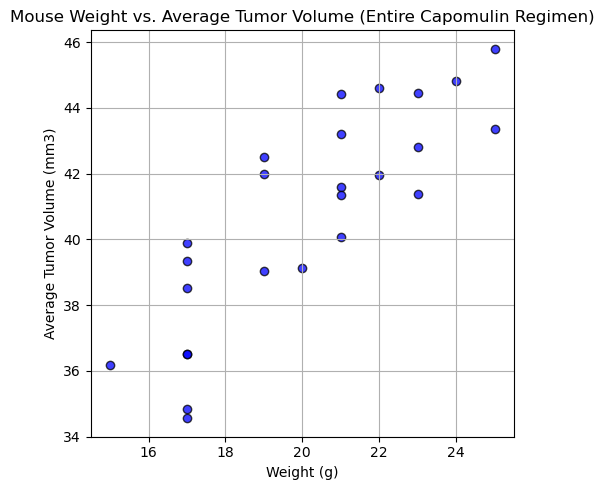

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
import pandas as pd

# This code filters data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Next, the code to calculate average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Next, the code to merge average tumor volume with mouse metadata to get weight for each mouse
avg_tumor_volume = avg_tumor_volume.merge(mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Then, the code to extract data for plotting
mouse_weight = avg_tumor_volume['Weight (g)']
avg_tumor_volume_values = avg_tumor_volume['Tumor Volume (mm3)']

# Finally, the code to create scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(mouse_weight, avg_tumor_volume_values, marker='o', facecolors='b', edgecolors='black', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume (Entire Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.841936342469472


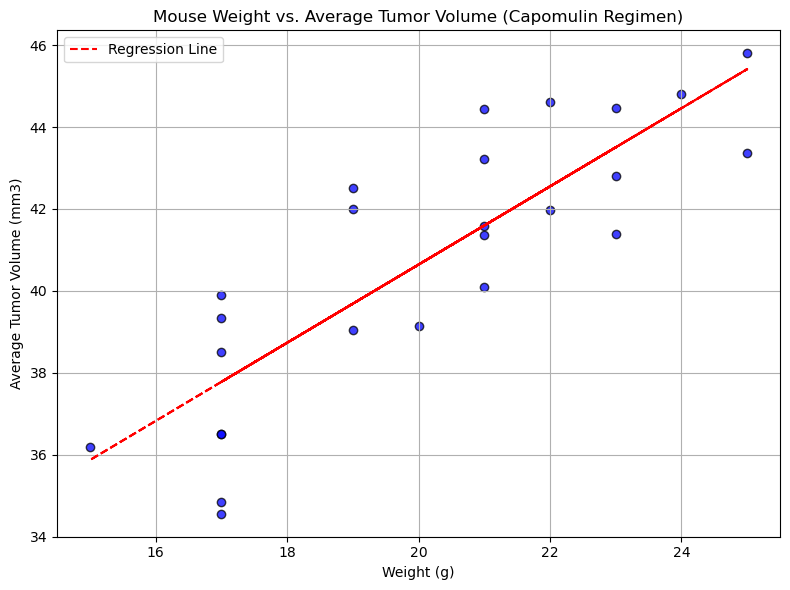

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

# First, the code to filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Second, the code to calculate average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Next, the code to merge average tumor volume with mouse metadata to get weight for each mouse
avg_tumor_volume = avg_tumor_volume.merge(mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Next, the code to calculate correlation coefficient
correlation_coefficient = st.pearsonr(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])[0]
print(f"Correlation Coefficient: {correlation_coefficient}")

# Next, the code to perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

# Then, the code to create regression line values
regress_values = avg_tumor_volume['Weight (g)'] * slope + intercept

# Finally, the code to plot scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], marker='o', facecolors='b', edgecolors='black', alpha=0.75)
plt.plot(avg_tumor_volume['Weight (g)'], regress_values, color='red', linestyle='--', label='Regression Line')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
